In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat, savemat
import pandas as pd
import scipy.special as SS
import scipy.stats as SSA
import copy
import random
import math
from sklearn.model_selection import ParameterGrid
import os
import numpy.linalg as LA

In [2]:
E_NewInf5 =  np.load('NewInf_r_0.01.npy')
E_NewInf6 =  np.load('NewInf_r_0.03162278.npy')
E_NewInf7 =  np.load('NewInf_r_0.02.npy')
E_NewInf8 =  np.load('NewInf_r_0.05.npy')

In [3]:
## generate a ts of non-negative binomial distribution to check any possible mutual information in time

In [77]:
r = 0.05
R0 = 2.5
x_cutoff = 100
p = r/(R0+r)
weights = np.zeros(x_cutoff)
for i in range(x_cutoff):
    temp1=SS.gamma(r+i)/SS.gamma(r)/SS.gamma((i+1))*np.power(p,r)*np.power((1-p),i)
    weights[i] = temp1
weights_n = weights/np.sum(weights)

In [10]:
# pop = 100000
Z = 3 # latent period
Zb = 1 # scale parameter for Z
D = 5 # infectious period
Db = 1 # scale parameter for b

In [78]:
T = 60
num_ens = 1000
E = np.zeros((num_ens,10*T))
# Tot_E = np.zeros((10,T*10))

In [79]:
E[:,0] = 100
# Tot_E[:0] = E[:,0]
for en_i in range(num_ens):
# en_i = 0
    for t in range(T):
        infector_i = E[en_i,t]
        new_inf = np.random.choice(len(weights_n), size = int(infector_i) , p=weights_n)
        z_num = np.sum(new_inf)
    #     print(z_num)
        latency_p = SSA.gamma.rvs(a = Z,scale=Zb,size = z_num)
        infectious_p = SSA.gamma.rvs(a = D,scale=Db,size = z_num)
        v = np.random.random_sample(z_num)
        delay_days = latency_p+v*infectious_p  #3+5*0.5
        day_idx = np.ceil(delay_days+t) 
        day_idx = np.int64(day_idx.tolist())
        for new_i in range(z_num):
            d_i = day_idx[new_i]
    #     print(day_idx)
            E[en_i,d_i] = E[en_i,d_i] +1

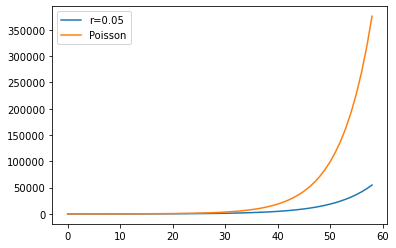

In [93]:
plt.plot(np.mean(E[:,1:60],axis=0),label='r=0.05')
plt.plot(np.mean(E_poisson[:,1:60],axis=0),label='Poisson')
plt.legend()

In [90]:
weights_p = np.zeros(x_cutoff)
for i in range(x_cutoff):
    temp1=SSA.poisson.pmf(i,R0)
    weights_p[i] = temp1
weights_p_n = weights_p/np.sum(weights_p)

In [91]:
T = 60
num_ens = 1000
E_poisson = np.zeros((num_ens,10*T))

In [92]:
E_poisson[:,0] = 100
# Tot_E[:0] = E[:,0]
for en_i in range(num_ens):
# en_i = 0
    for t in range(T):
        infector_i = E_poisson[en_i,t]
        new_inf = np.random.choice(len(weights_n), size = int(infector_i) , p=weights_p_n)
        z_num = np.sum(new_inf)
    #     print(z_num)
        latency_p = SSA.gamma.rvs(a = Z,scale=Zb,size = z_num)
        infectious_p = SSA.gamma.rvs(a = D,scale=Db,size = z_num)
        v = np.random.random_sample(z_num)
        delay_days = latency_p+v*infectious_p  #3+5*0.5
        day_idx = np.ceil(delay_days+t) 
        day_idx = np.int64(day_idx.tolist())
    #     print(day_idx)
        for new_i in range(z_num):
            d_i = day_idx[new_i]
    #     print(day_idx)
            E_poisson[en_i,d_i] = E_poisson[en_i,d_i] +1